In [159]:
#Importing the Dependencies

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [160]:
#Data Collection and Processing

# loading the csv data to a Pandas DataFrame
log_data = pd.read_csv('2021-01-01.csv',low_memory=False) #,sep="|", low_memory=True

In [161]:
# print first 5 rows of the dataset
log_data.head()

Category     Type  Target-Cat  Target-Type  Target
0    ERROR   Notice           1            1       1
1    ERROR   Notice           1            1       1
2    ERROR   Notice           1            1       1
3     INFO  7.34 Vi           0            4       0
4     INFO  3.7 Vis           0            4       0

In [162]:
# print last 5 rows of the dataset
log_data.tail()

Category    Type  Target-Cat  Target-Type  Target
475675    ERROR  Notice           1            1       1
475676    ERROR  Notice           1            1       1
475677    ERROR  Notice           1            1       1
475678    ERROR  Notice           1            1       1
475679    ERROR  Notice           1            1       1

In [163]:
# number of rows and columns in the dataset
log_data.shape

(475680, 5)

In [164]:
# getting some info about the data
log_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 475680 entries, 0 to 475679
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Category     475680 non-null  object
 1   Type         475680 non-null  object
 2   Target-Cat   475680 non-null  int64 
 3   Target-Type  475680 non-null  int64 
 4   Target       475680 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 18.1+ MB


In [165]:
# checking for missing values
log_data.isnull().sum()

Category       0
Type           0
Target-Cat     0
Target-Type    0
Target         0
dtype: int64

In [166]:
# statistical measures about the data
log_data.describe()

Target-Cat    Target-Type         Target
count  475680.000000  475680.000000  475680.000000
mean        0.740683       1.826873       0.740344
std         0.438260       1.304259       0.438446
min         0.000000       1.000000       0.000000
25%         0.000000       1.000000       0.000000
50%         1.000000       1.000000       1.000000
75%         1.000000       4.000000       1.000000
max         1.000000       4.000000       1.000000

In [167]:
# checking the distribution of Target Variable
log_data['Target'].value_counts()

1    352167
0    123513
Name: Target, dtype: int64

In [168]:
# 1 - TRUE  - YES Error
# 0 - FALSE - NO Error

In [169]:
#Splitting the Features and Target
X = log_data.drop(['Category','Type','Target'],axis=1)
Y = log_data['Target']

In [170]:
print(X)

        Target-Cat  Target-Type
0                1            1
1                1            1
2                1            1
3                0            4
4                0            4
...            ...          ...
475675           1            1
475676           1            1
475677           1            1
475678           1            1
475679           1            1

[475680 rows x 2 columns]


In [171]:
print(Y)

0         1
1         1
2         1
3         0
4         0
         ..
475675    1
475676    1
475677    1
475678    1
475679    1
Name: Target, Length: 475680, dtype: int64


In [172]:
#Splitting the Data into Training data & Test Data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [173]:
#https://www.youtube.com/watch?v=qmqCYC-MBQo&ab_channel=Siddhardhan
#https://www.youtube.com/watch?v=fn33V4iX5G4&ab_channel=TeacherAsim

In [175]:
print(X.shape, X_train.shape, X_test.shape)

(475680, 2) (380544, 2) (95136, 2)


In [176]:
#Training model
model = LogisticRegression()

In [177]:
# training the LogisticRegression model with Training data
model.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

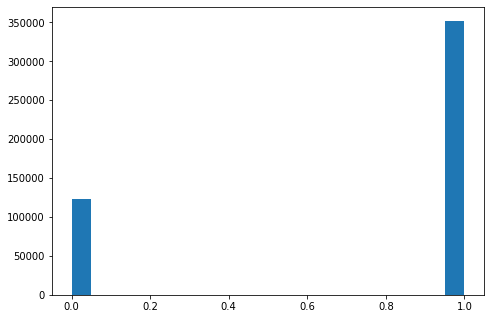

In [179]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.hist(log_data["Target"],20)
plt.show()

In [180]:
# accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [181]:
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  1.0


In [182]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [183]:
print('Accuracy on Test data : ', test_data_accuracy)

Accuracy on Test data :  1.0


In [192]:
input_data = (0,4)

# change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)

# reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]== 0):
  print('The Mention log has error')
else:
  print('The Mention log has no error')

[0]
The Mention log has error
